# Complexplorer API Cookbook

This notebook provides practical recipes and patterns for using complexplorer effectively. It includes:

1. **Function Gallery**: Common complex functions and their visualizations
2. **Domain Patterns**: Advanced domain restrictions and compositions
3. **Colormap Selection Guide**: Choosing the right colormap for your function
4. **Quality Optimization**: PyVista tips for publication-quality figures
5. **Performance Guidelines**: When to use matplotlib vs PyVista

Each recipe includes the mathematical background, code, and visualization tips.

In [1]:
# Import everything we need
import numpy as np
import complexplorer as cp
import matplotlib.pyplot as plt

# For high-quality 3D plots
import warnings
warnings.filterwarnings('ignore')  # Suppress PyVista notebook warnings

## 1. Function Gallery

### 1.1 Polynomials

Polynomials are entire functions (no poles) with zeros at their roots.

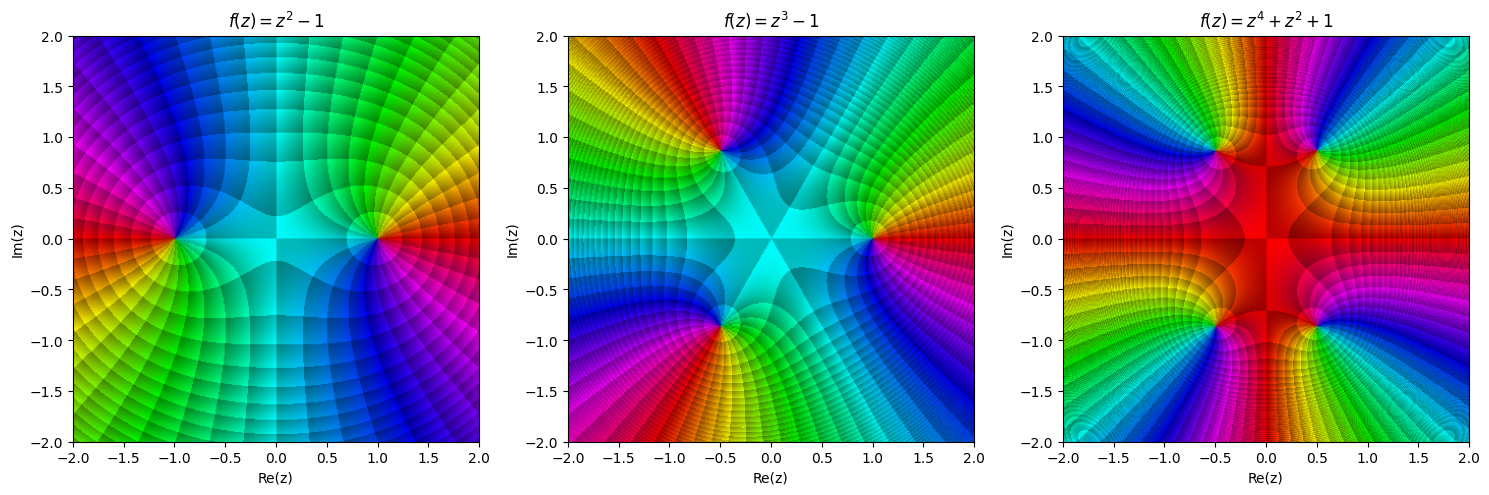

In [2]:
# Quadratic polynomial with two zeros
def quadratic(z):
    return z**2 - 1  # Zeros at z = ±1

# Cubic polynomial with three zeros
def cubic(z):
    return z**3 - 1  # Zeros at cube roots of unity

# Quartic polynomial
def quartic(z):
    return z**4 + z**2 + 1

# Visualize polynomials side by side
domain = cp.Rectangle(4, 4)
cmap = cp.Phase(n_phi=12, auto_scale_r=True)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

cp.plot(domain, quadratic, cmap=cmap, ax=axes[0])
axes[0].set_title(r'$f(z) = z^2 - 1$')

cp.plot(domain, cubic, cmap=cmap, ax=axes[1])
axes[1].set_title(r'$f(z) = z^3 - 1$')

cp.plot(domain, quartic, cmap=cmap, ax=axes[2])
axes[2].set_title(r'$f(z) = z^4 + z^2 + 1$')

plt.tight_layout()
plt.show()

**Recipe: Polynomial Visualization**
- Zeros appear as points where all colors meet
- The number of times colors wrap around a zero equals its multiplicity
- Use enhanced phase portraits to see both zeros and growth rate

### 1.2 Rational Functions with Poles

Rational functions have both zeros (numerator) and poles (denominator).

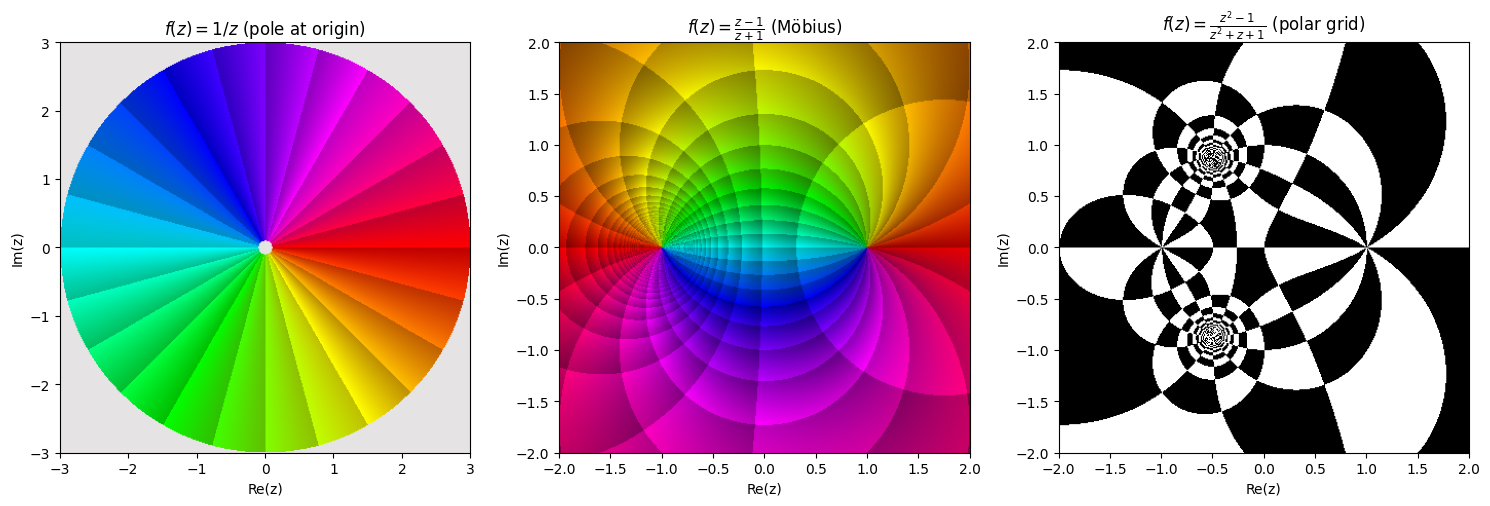

In [3]:
# Simple pole at origin
def reciprocal(z):
    return 1 / z

# Möbius transformation
def mobius(z):
    return (z - 1) / (z + 1)

# Rational function with multiple poles
def rational_complex(z):
    return (z**2 - 1) / (z**2 + z + 1)

# Use annulus to avoid pole at origin for 1/z
domain_annulus = cp.Annulus(inner_radius=0.1, outer_radius=3)
domain_rect = cp.Rectangle(4, 4)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Different colormaps for different features
cp.plot(domain_annulus, reciprocal, cmap=cp.Phase(n_phi=12), ax=axes[0])
axes[0].set_title(r'$f(z) = 1/z$ (pole at origin)')

cp.plot(domain_rect, mobius, cmap=cp.Phase(n_phi=12, auto_scale_r=True), ax=axes[1])
axes[1].set_title(r'$f(z) = \frac{z-1}{z+1}$ (Möbius)')

cp.plot(domain_rect, rational_complex, cmap=cp.PolarChessboard(), ax=axes[2])
axes[2].set_title(r'$f(z) = \frac{z^2-1}{z^2+z+1}$ (polar grid)')

plt.tight_layout()
plt.show()

**Recipe: Handling Poles**
- Use `Annulus` domain to exclude poles at origin
- Poles show reversed color winding (opposite of zeros)
- `PolarChessboard` helps visualize pole structure
- Consider domain restrictions for numerical stability

### 1.3 Transcendental Functions

Exponential, trigonometric, and logarithmic functions have unique behaviors.

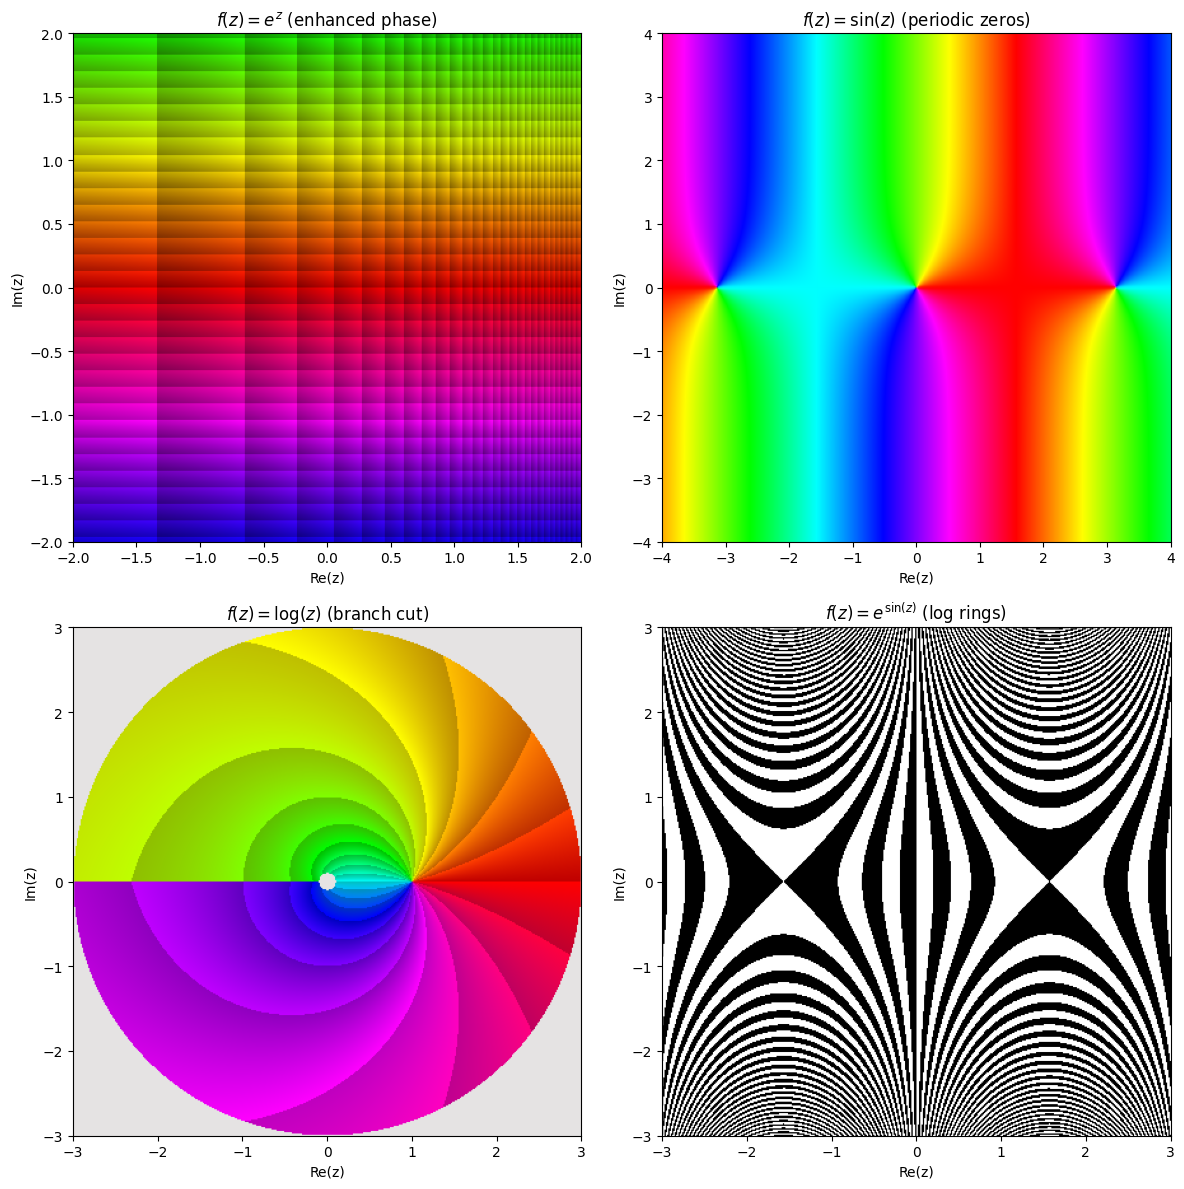

In [4]:
# Exponential function - rapid growth
def exponential(z):
    return np.exp(z)

# Sine function - periodic zeros
def sine(z):
    return np.sin(z)

# Complex logarithm - branch cut
def logarithm(z):
    return np.log(z)

# Different domains for different functions
domain_exp = cp.Rectangle(4, 4)  # Exponential grows fast
domain_sin = cp.Rectangle(8, 4)  # Show periodicity
domain_log = cp.Annulus(0.1, 3)  # Avoid branch point

fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Exponential with enhanced phase
cp.plot(domain_exp, exponential, cmap=cp.Phase(n_phi=24, auto_scale_r=True), ax=axes[0,0])
axes[0,0].set_title(r'$f(z) = e^z$ (enhanced phase)')

# Sine with basic phase to see zeros
cp.plot(domain_sin, sine, cmap=cp.Phase(), ax=axes[0,1])
axes[0,1].set_title(r'$f(z) = \sin(z)$ (periodic zeros)')

# Logarithm showing branch cut
cp.plot(domain_log, logarithm, cmap=cp.Phase(n_phi=12), ax=axes[1,0])
axes[1,0].set_title(r'$f(z) = \log(z)$ (branch cut)')

# Composition: exp(sin(z))
def exp_sin(z):
    return np.exp(np.sin(z))

cp.plot(cp.Rectangle(6, 4), exp_sin, cmap=cp.LogRings(), ax=axes[1,1])
axes[1,1].set_title(r'$f(z) = e^{\sin(z)}$ (log rings)')

plt.tight_layout()
plt.show()

**Recipe: Transcendental Functions**
- `exp(z)`: Use enhanced phase with many sectors to show rapid growth
- `sin(z)`, `cos(z)`: Use wider domains to show periodicity
- `log(z)`: Use annulus to avoid branch point at origin
- `LogRings` colormap excellent for showing modulus variations

### 1.4 Essential Singularities

Functions like $e^{1/z}$ have essential singularities where the function exhibits chaotic behavior.

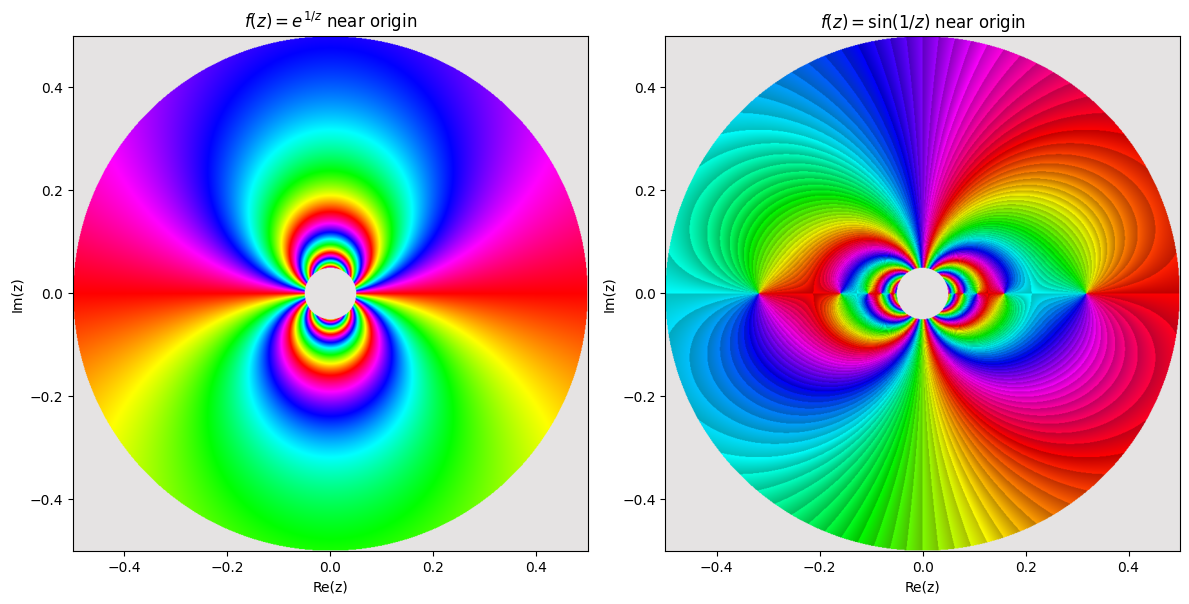

Essential singularities show infinite oscillation near the singular point.
High resolution (800x800) captures the chaotic behavior.


In [5]:
# Essential singularity at origin
def exp_reciprocal(z):
    return np.exp(1/z)

# Sin(1/z) - another essential singularity
def sin_reciprocal(z):
    return np.sin(1/z)

# Use small annulus near singularity
domain_ess = cp.Annulus(0.05, 0.5)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# High resolution needed near essential singularity
cp.plot(domain_ess, exp_reciprocal, cmap=cp.Phase(), resolution=800, ax=axes[0])
axes[0].set_title(r'$f(z) = e^{1/z}$ near origin')

cp.plot(domain_ess, sin_reciprocal, cmap=cp.Phase(n_phi=24), resolution=800, ax=axes[1])
axes[1].set_title(r'$f(z) = \sin(1/z)$ near origin')

plt.tight_layout()
plt.show()

print("Essential singularities show infinite oscillation near the singular point.")
print("High resolution (800x800) captures the chaotic behavior.")

## 2. Domain Restriction Patterns

### 2.1 Domain Composition

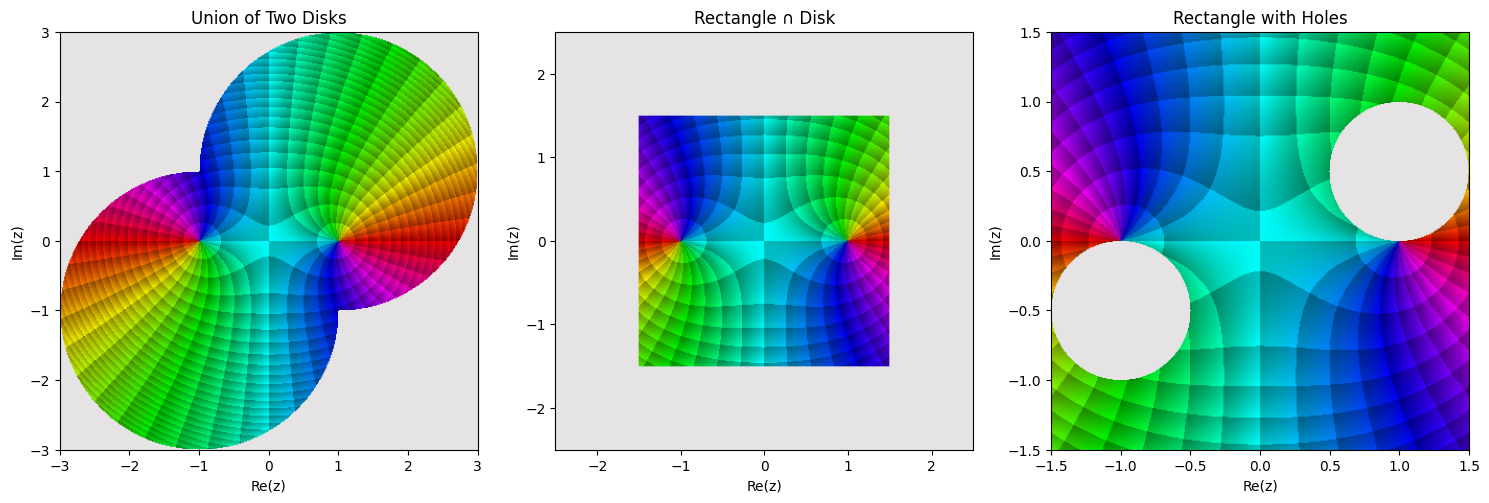

In [6]:
# Create interesting domain compositions
rect = cp.Rectangle(3, 3)
disk1 = cp.Disk(2, center=1+1j)
disk2 = cp.Disk(2, center=-1-1j)

# Union of domains
domain_union = disk1 | disk2

# Intersection
domain_intersect = rect & cp.Disk(2.5)

# Complex composition: rectangle with holes
hole1 = cp.Disk(0.5, center=1+0.5j)
hole2 = cp.Disk(0.5, center=-1-0.5j)
domain_with_holes = rect - hole1 - hole2

# Visualize different domains
func = lambda z: z**2 - 1
cmap = cp.Phase(n_phi=12, auto_scale_r=True)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

cp.plot(domain_union, func, cmap=cmap, ax=axes[0])
axes[0].set_title('Union of Two Disks')

cp.plot(domain_intersect, func, cmap=cmap, ax=axes[1])
axes[1].set_title('Rectangle ∩ Disk')

cp.plot(domain_with_holes, func, cmap=cmap, ax=axes[2])
axes[2].set_title('Rectangle with Holes')

plt.tight_layout()
plt.show()

**Recipe: Domain Operations**
- Use `|` for union, `&` for intersection, `-` for difference
- Create domains with holes to exclude singularities
- Compose multiple domains for complex regions
- Higher resolution may be needed for complex boundaries

### 2.2 Custom Domain Patterns

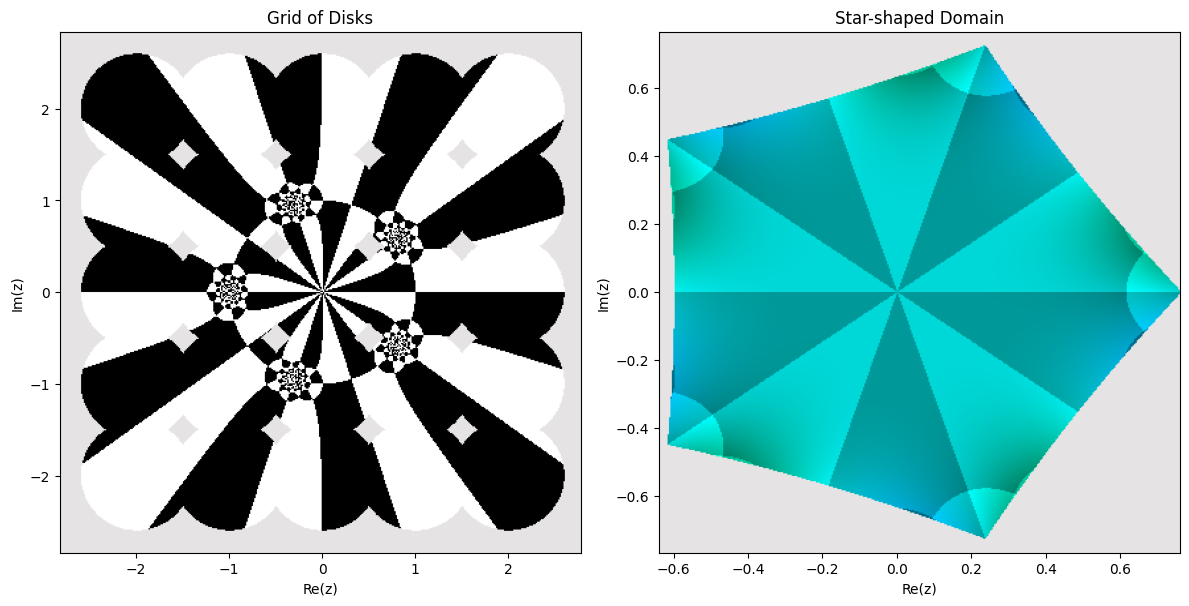

In [3]:
# Create a grid of small disks
def create_disk_grid(n=3, spacing=2, radius=0.6):
    """Create a grid of disks."""
    domain = None
    for i in range(-n, n+1):
        for j in range(-n, n+1):
            center = spacing * (i + 1j*j)
            disk = cp.Disk(radius, center=center)
            domain = disk if domain is None else domain | disk
    return domain

# Create a star-shaped domain
def create_star_domain(n_points=5, outer_radius=3, inner_radius=1.5):
    """Create a star by intersecting rotated rectangles."""
    # Start with a large disk
    domain = cp.Disk(outer_radius)
    
    # Subtract wedges to create star points
    angle_step = 2 * np.pi / n_points
    for i in range(n_points):
        angle = i * angle_step + angle_step / 2
        center = 2 * outer_radius * np.exp(1j * angle)
        domain = domain - cp.Disk(1.8 * outer_radius, center=center)
    
    return domain

# Visualize custom domains
domain_grid = create_disk_grid(n=2, spacing=1, radius=0.6)
domain_star = create_star_domain()

func = lambda z: (z**5 - 1) / (z**5 + 1)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

cp.plot(domain_grid, func=func, cmap=cp.Chessboard(spacing=1), ax=axes[0])
axes[0].set_title('Grid of Disks')

cp.plot(domain_star, func, cmap=cp.Phase(n_phi=15, auto_scale_r=True), ax=axes[1])
axes[1].set_title('Star-shaped Domain')

plt.tight_layout()
plt.show()

## 3. Colormap Selection Guide

Choosing the right colormap depends on what features you want to highlight.

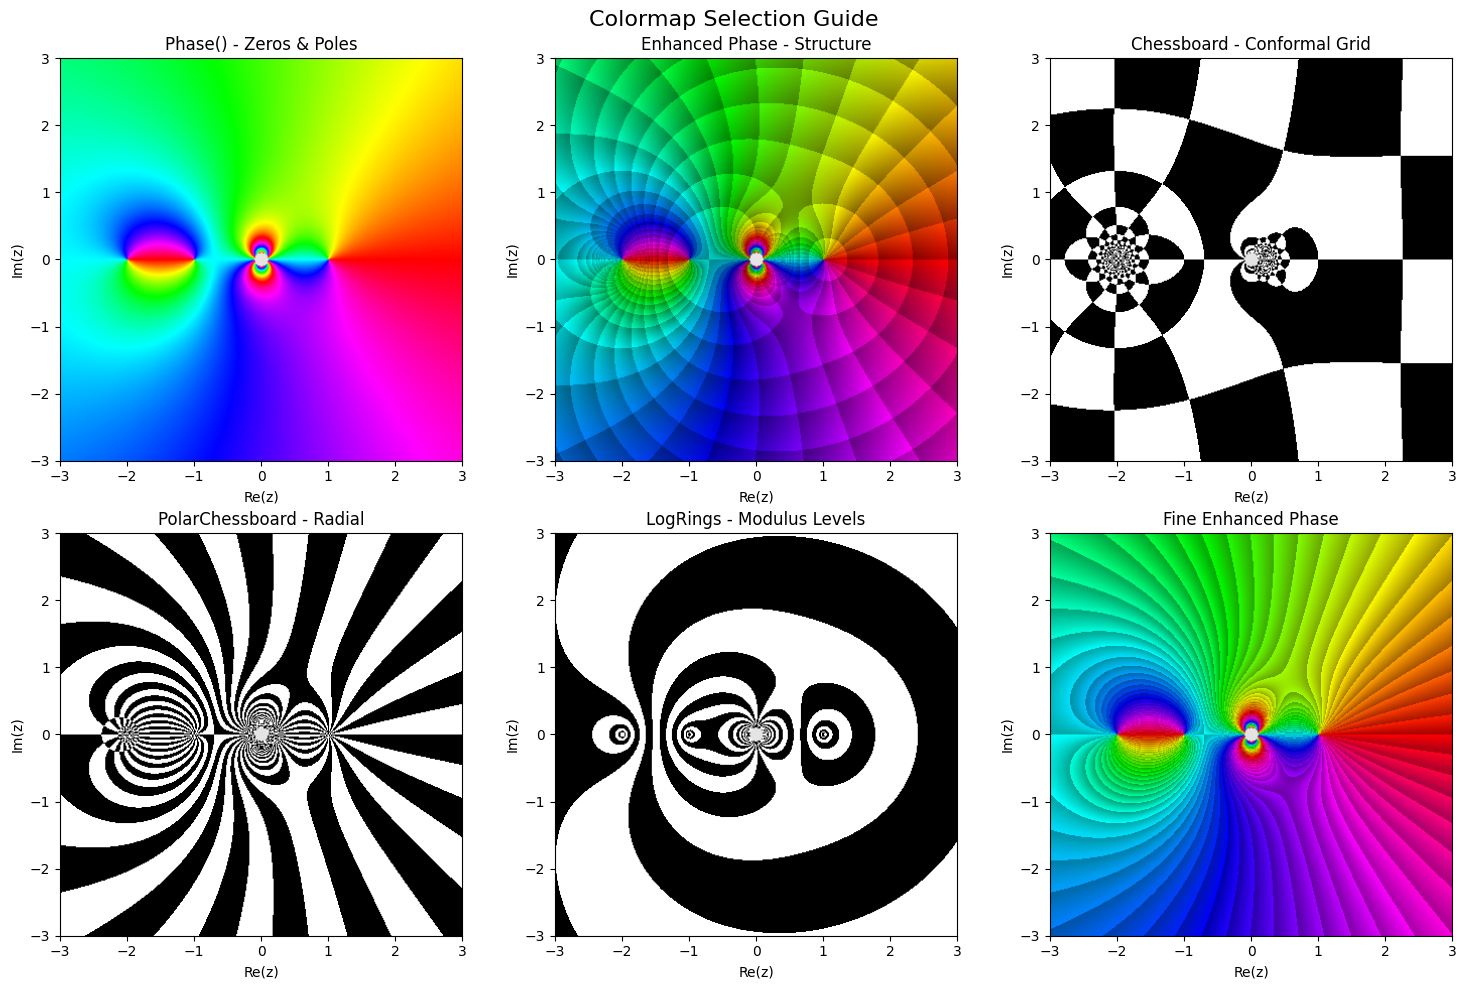

In [18]:
# Test function with zeros, poles, and essential singularity
def test_func(z):
    return (z**2 - 1) * np.exp(1/z) / (z + 2)

domain = cp.Rectangle(6, 6) - cp.Disk(0.1)  # Exclude essential singularity

# Compare different colormaps
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Colormap Selection Guide', fontsize=16)

# 1. Basic phase - shows zeros and poles clearly
cp.plot(domain, test_func, cmap=cp.Phase(), ax=axes[0,0])
axes[0,0].set_title('Phase() - Zeros & Poles')

# 2. Enhanced phase - adds modulus information
cp.plot(domain, test_func, cmap=cp.Phase(n_phi=12, auto_scale_r=True), ax=axes[0,1])
axes[0,1].set_title('Enhanced Phase - Structure')

# 3. Chessboard - Cartesian grid
cp.plot(domain, test_func, cmap=cp.Chessboard(spacing=1.5), ax=axes[0,2])
axes[0,2].set_title('Chessboard - Conformal Grid')

# 4. Polar chessboard - radial structure
cp.plot(domain, test_func, cmap=cp.PolarChessboard(n_phi=16, spacing=8), ax=axes[1,0])
axes[1,0].set_title('PolarChessboard - Radial')

# 5. Log rings - modulus levels
cp.plot(domain, test_func, cmap=cp.LogRings(log_spacing=0.5), ax=axes[1,1])
axes[1,1].set_title('LogRings - Modulus Levels')

# 6. Custom enhanced phase
cp.plot(domain, test_func, cmap=cp.Phase(n_phi=24, scale_radius=0.5, v_base=0.3), ax=axes[1,2])
axes[1,2].set_title('Fine Enhanced Phase')

plt.tight_layout()
plt.show()

**Colormap Selection Guidelines:**

1. **Phase()** - Best for identifying zeros and poles
2. **Phase(n_phi=N, auto_scale_r=True)** - Shows both phase and modulus
3. **Chessboard()** - Visualizes conformal mappings
4. **PolarChessboard()** - Emphasizes radial structure
5. **LogRings()** - Highlights modulus growth rates

## 4. PyVista Quality Tips

For publication-quality 3D visualizations, always use PyVista with `notebook=False`.

In [20]:
# High-quality 3D landscape
domain = cp.Rectangle(4, 4)
func = lambda z: (z**2 - 1) / (z**2 + 1)

print("Creating high-quality 3D visualization...")
print("A separate window will open with interactive controls.")
print("\nTips for best quality:")
print("- Use mouse to rotate/zoom")
print("- Press 'q' to close the window")
print("- Press 's' to save a screenshot")
print("- Use resolution=300+ for publication figures")

# High-quality external window
plotter = cp.plot_landscape_pv(
    domain, 
    func,
    cmap=cp.Phase(n_phi=12, auto_scale_r=True),
    resolution=300,
    z_scale=0.5,
    z_max=10,
    notebook=False,  # CRITICAL: External window for quality
    show=True
)

Creating high-quality 3D visualization...
A separate window will open with interactive controls.

Tips for best quality:
- Use mouse to rotate/zoom
- Press 'q' to close the window
- Press 's' to save a screenshot
- Use resolution=300+ for publication figures


In [23]:
# Riemann sphere with modulus scaling
print("\nRiemann sphere with multiple scaling modes:")
print("This shows how different scalings emphasize different features.")

# Create Riemann sphere with arctan scaling
plotter = cp.riemann_pv(
    func,
    cmap=cp.Phase(n_phi=16),
    modulus_mode='arctan',
    modulus_params={'r_min': 0.3, 'r_max': 1.0},
    resolution=200,
    notebook=False,  # High quality
    show=True,
    window_size=(800, 800)
)


Riemann sphere with multiple scaling modes:
This shows how different scalings emphasize different features.


## Summary: Best Practices

### Function Visualization
1. **Polynomials**: Use enhanced phase portraits to see zeros and growth
2. **Rational functions**: Use domain restrictions to handle poles
3. **Transcendental**: Choose domains that show key features
4. **Essential singularities**: Use high resolution and small domains

### Domain Selection
1. Use `Annulus` to exclude poles/singularities
2. Compose domains with `|`, `&`, `-` operators
3. Create custom domains for special visualizations

### Colormap Choice
1. `Phase()`: Identify zeros and poles
2. `Phase(auto_scale_r=True)`: See structure
3. `Chessboard()`: Conformal mappings
4. `LogRings()`: Modulus growth

### Quality Tips
1. **Always** use `notebook=False` for PyVista in Jupyter
2. Use resolution 300+ for publication figures
3. Set custom camera positions for consistent views
4. Enable anti-aliasing for smooth edges

### Performance
1. PyVista is 15-30x faster than matplotlib for 3D
2. Start with low resolution for exploration
3. Increase resolution for final figures
4. Use off-screen rendering for batch processing

In [28]:
# Final example: Putting it all together
print("Final Example: Beautiful phase portrait with all best practices")
print("This will open in a high-quality external window.")

# Complex function with interesting features
def beautiful_func(z):
    return (z**4 - 1) * np.exp(-z**2/10) / (z**2 + 0.5)**2

# Optimal domain
domain = cp.Rectangle(6, 6) - cp.Disk(0.1)

# High-quality 3D visualization
plotter = cp.pair_plot_landscape_pv(
    domain,
    beautiful_func,
    cmap=cp.Phase(n_phi=16, auto_scale_r=True, scale_radius=0.8),
    resolution=350,
    z_scale=0.4,
    z_max=10,
    notebook=False,
    show=True,
    window_size=(1600, 800)
)

print("\nPress 'q' to close the visualization window.")

Final Example: Beautiful phase portrait with all best practices
This will open in a high-quality external window.

Press 'q' to close the visualization window.
